# Background

Data provided is on oil samples from three regions. A model will need to be built that will help pick the region with the highest profit margin by predicting the volume of reserves in the new wells and applying the monetary value with it. 

The meaning of the model's features are unimportant, but understanding the output and the relevance to business profit is necessary. Potential profit and risks will need to be analyzed as well. 

### Background: Business Details 
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 million USD.
- One barrel of raw materials brings 4.5 USD of revenue 
- The revenue from one unit of product is 4,500 USD (volume of reserves is in thousand barrels).

# Preparing the Data

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

df0 = pd.read_csv('geo_data_0.csv')
df1 = pd.read_csv('geo_data_1.csv')
df2 = pd.read_csv('geo_data_2.csv')

There are 3 regions that will be analyzed here, each denoted by a different dataframe

In [2]:
df0.info(); print()
df1.info(); print()
df2.info(); print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3

In [2]:
df0.head(2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062
1,2acmU,1.334711,-0.340164,4.36508,73.037750


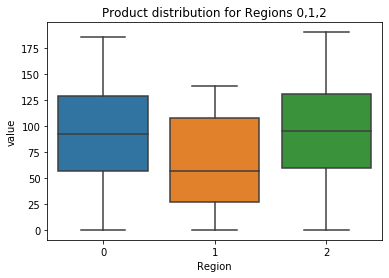

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns 

df0_p = pd.DataFrame(df0['product']).assign(Region=0)
df1_p = pd.DataFrame(df1['product']).assign(Region=1)
df2_p = pd.DataFrame(df2['product']).assign(Region=2)
cdf = pd.concat([df0_p, df1_p, df2_p])      # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Region'])      # MELT

ax = sns.boxplot(x="Region", y="value", data=mdf).set_title("Product distribution for Regions 0,1,2")  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

We see that Region 1 has the largest difference between the mean and the median, which is an indicator of skewed distribution or outliers. I don't think this difference is extremely significant and will move forward. The other dataframes have low mean and median differences.

# Training and Testing the Model

### Linear Regression: Region 0

In [5]:
features0 = df0.drop(['id','product'],axis=1) #dropping id because unique identifiers do not help model accuracy 
target0 = df0['product']

features0_train, features0_valid, target0_train, target0_valid = train_test_split(features0, target0, 
                                                                              test_size=0.25, random_state=12345) 
scaler = StandardScaler()
scaler.fit(features0_train)
features0_train = scaler.transform(features0_train)
features0_valid = scaler.transform(features0_valid)

In [6]:
model0 = LinearRegression(normalize=True)
model0.fit(features0_train, target0_train)
model0.score(features0_valid, target0_valid)

0.27994321524487786

It seems that scaling did not improve the accuracy of this model. Truthfully, the model does not score well, and I'm not sure how to improve my predicted values here. 

In [7]:
predictions0 =  model0.predict(features0_valid)
predictions0 = pd.Series(predictions0, index=target0_valid.index)
mse0 = mean_squared_error(target0_valid, predictions0)
print('Average volume of predicted reserves:',round(np.mean(predictions0),3), 'thousand barrels')
print('rmse:',round(mse0**0.5,3))

Average volume of predicted reserves: 92.593 thousand barrels
rmse: 37.579


The average predicted reserves is pretty high at 92 barrels, but the rmse is also high which makes sense because the model accuracy is low. I would be cautious when using these numbers. 

### Linear Regression: Region 1

In [8]:
features1 = df1.drop(['id','product'],axis=1) 
target1 = df1['product']

features1_train, features1_valid, target1_train, target1_valid = train_test_split(features1, target1, 
                                                                              test_size=0.25, random_state=12345) 
scaler = StandardScaler()
scaler.fit(features1_train)
features1_train = scaler.transform(features1_train)
features1_valid = scaler.transform(features1_valid)

In [9]:
model1 = LinearRegression(normalize=True)
model1.fit(features1_train, target1_train)
model1.score(features1_valid, target1_valid)

0.9996233978805126

In [10]:
predictions1 = model1.predict(features1_valid)
predictions1 = pd.Series(predictions1, index=target0_valid.index)
mse1 = mean_squared_error(target1_valid, predictions1)
print('Average volume of predicted reserves:',round(np.mean(predictions1),3), 'thousand barrels')
print('rmse:',round(mse1**0.5,3))

Average volume of predicted reserves: 68.729 thousand barrels
rmse: 0.893


The accuracy of this model is extremely high which is also rewarded with a very small rmse. While the average predicted reserves is smaller than Region 0 and Region 2 below, I am more confident that these numbers predict the product generated in each region.

### Linear Regression: Region 2

In [11]:
features2 = df2.drop(['id','product'],axis=1) 
target2 = df2['product']

features2_train, features2_valid, target2_train, target2_valid = train_test_split(features2, target2, 
                                                                              test_size=0.25, random_state=12345) 
scaler = StandardScaler()
scaler.fit(features2_train)
features2_train = scaler.transform(features2_train)
features2_valid = scaler.transform(features2_valid)

In [12]:
model2 = LinearRegression()
model2.fit(features2_train, target2_train)
model2.score(features2_valid, target2_valid)

0.20524758386040443

In [13]:
predictions2 = model2.predict(features2_valid)
predictions2 = pd.Series(predictions2, index=target0_valid.index)
mse2 = mean_squared_error(target2_valid, predictions2)
print('Average volume of predicted reserves:',round(np.mean(predictions2),3), 'thousand barrels')
print('rmse:',round(mse2**0.5,3))

Average volume of predicted reserves: 94.965 thousand barrels
rmse: 40.03


Very similar to Region 0, the accuracy of the model performs very poorly which explains the poor rmse value as well. The average volume is high, but should be careful to trust it.

# Profit Calculation

Revenue per unit * Number of units per well * Number of wells = 100000000

x = 100000000 / (Revenue per unit * Number of wells)

In [14]:
WELLCOUNT = 200 
TOP200_BUDGET = 100000000
UNIT_REV = 4500 

x = TOP200_BUDGET / (UNIT_REV * WELLCOUNT)
print('Minimum volume of reserves (thousand barrels) in each well per 200 wells needed to break even',x)
print('Region 0: Average volume of predicted reserves:',round(np.mean(df0['product']),3), 'thousand barrels')
print('Region 1: Average volume of predicted reserves:',round(np.mean(df1['product']),3), 'thousand barrels')
print('Region 2: Average volume of predicted reserves:',round(np.mean(df2['product']),3), 'thousand barrels')

Minimum volume of reserves (thousand barrels) in each well per 200 wells needed to break even 111.11111111111111
Region 0: Average volume of predicted reserves: 92.5 thousand barrels
Region 1: Average volume of predicted reserves: 68.825 thousand barrels
Region 2: Average volume of predicted reserves: 95.0 thousand barrels


Using some simple math, we can see that the minimum average produced product needed to break even for 200 wells is 111. This is performed by dividing the budget for 200 wells (10 million USD) by both the unit revenue per product (4500 USD) and the count of wells (200).

When you take the average of all 10000 wells for each region, we get average product of 92.5, 68.825, and 95 for each region respectively. These region averages are below the minimum averagre which makes it seem not possible to become profitable.

In [15]:
df0_200 = df0.sort_values('product',ascending=False).head(200)
df1_200 = df1.sort_values('product',ascending=False).head(200)
df2_200 = df2.sort_values('product',ascending=False).head(200)
print('Region 0: Average volume of predicted reserves:',round(np.mean(df0_200['product']),3), 'thousand barrels')
print('Region 1: Average volume of predicted reserves:',round(np.mean(df1_200['product']),3), 'thousand barrels')
print('Region 2: Average volume of predicted reserves:',round(np.mean(df2_200['product']),3), 'thousand barrels')

Region 0: Average volume of predicted reserves: 184.834 thousand barrels
Region 1: Average volume of predicted reserves: 137.945 thousand barrels
Region 2: Average volume of predicted reserves: 189.551 thousand barrels


When you consider only the top 200 wells in each region, you can see that is actually quite possible for each region to meet well above the threshold of 111.11 wells and become profitable.

# Calculating profit from a set of selected oil wells and model predictions:

### Model Prediction Profit: Region 0

In [16]:
predictions0_top200 = predictions0.sort_values(ascending=False).head(200)
p0_top200_total = predictions0_top200.sum()

In [17]:
print('Total product in the top 200 wells of Region 0:', p0_top200_total)
print('Expected profit from 200 wells in Region 0:',round(p0_top200_total * UNIT_REV - TOP200_BUDGET,2),'USD')

Total product in the top 200 wells of Region 0: 31102.33083881141
Expected profit from 200 wells in Region 0: 39960488.77 USD


### Model Prediction Profit: Region 1 

In [18]:
predictions1_top200 = predictions1.sort_values(ascending=False).head(200)
p1_top200_total = predictions1_top200.sum()

In [19]:
print('Total product in the top 200 wells of Region 1:', p1_top200_total)
print('Expected profit from 200 wells in Region 1:',round(p1_top200_total * UNIT_REV - TOP200_BUDGET,2),'USD')

Total product in the top 200 wells of Region 1: 27746.02678216343
Expected profit from 200 wells in Region 1: 24857120.52 USD


### Model Prediction Profit: Region 2

In [20]:
predictions2_top200 = predictions2.sort_values(ascending=False).head(200)
p2_top200_total = predictions2_top200.sum()

In [21]:
print('Total product in the top 200 wells of Region 2:', p2_top200_total)
print('Expected profit from 200 wells in Region 2:',round(p2_top200_total * UNIT_REV - TOP200_BUDGET,2),'USD')

Total product in the top 200 wells of Region 2: 29603.89865831835
Expected profit from 200 wells in Region 2: 33217543.96 USD


Observing total reserves of the top 200 product producing wells from our linear regression predictions, we can see that Region 0 produced the greatest number of product and thus produced the greatest amount of profit. Looking at this information, I would recommend Region 0 for well development because of the bountiful wells that our model predicted. Of course, this is based off our predicted model which obtained poor accuracy which needs to be kept in mind.

# Bootstrapping

The bootstrap resampling method will be used here obtain better summary statistics on each region. An explanation of the bootstrap process is found at the end of the notebook.

The profit function will find the top 200 predicted values and provide the respective real samples based on the predicted index. With these real samples from the original dataframe, these 200 samples are summed and multiplied by the revenue generated from these wells, then subtracted by the budget to provide the profit. This profit is a single data point within the looped resampling for this region.

In [22]:
def profit(real, predicted, count):
    unit_sorted = predicted.sort_values(ascending=False)
    selected = real[unit_sorted.index][:count]
    return (UNIT_REV * selected.sum()) - (TOP200_BUDGET)

### Bootstrap: Region 0

In [23]:
state = np.random.RandomState(12345)
distributionValues0 = []
for i in range(1000):
    real = target0_valid.sample(n=500, replace=True, random_state=state)
    pred = predictions0[real.index]
    distributionValues0.append(profit(real, pred, 200))
    
distributionValues0 = pd.Series(distributionValues0)
avgProfit0 = distributionValues0.mean()
lower = distributionValues0.quantile(0.025)
upper = distributionValues0.quantile(0.975)
loss = (len(distributionValues0[distributionValues0 < 0]) / 1000) * 100

print('Average:',round(avgProfit0,2),'USD')
print('95% Confidence Interval:(',round(lower,2),',',round(upper,2),')')
print('Risk of loss:', loss, '%')

Average: 4259385.27 USD
95% Confidence Interval:( -1020900.95 , 9479763.53 )
Risk of loss: 6.0 %


### Bootstrap: Region 1

In [24]:
distributionValues1 = []
for i in range(1000):
    real = target1_valid.sample(n=500, replace=True, random_state=state)
    pred = predictions1[real.index]
    distributionValues1.append(profit(real, pred, 200))
    
distributionValues1 = pd.Series(distributionValues1)
avgProfit1 = distributionValues1.mean()
lower = distributionValues1.quantile(0.025)
upper = distributionValues1.quantile(0.975)
loss = (len(distributionValues1[distributionValues1 < 0]) / 1000) * 100

print('Average:',round(avgProfit1,2),'USD')
print('95% Confidence Interval:(',round(lower,2),',',round(upper,2),')')
print('Risk of loss:', loss, '%')

Average: 5182594.94 USD
95% Confidence Interval:( 1281232.31 , 9536129.82 )
Risk of loss: 0.3 %


### Bootstrap: Region 2

In [25]:
distributionValues2 = []
for i in range(1000):
    real = target2_valid.sample(n=500, replace=True, random_state=state)
    pred = predictions2[real.index]
    distributionValues2.append(profit(real, pred, 200))
    
distributionValues2 = pd.Series(distributionValues2)
avgProfit2 = distributionValues2.mean()
lower = distributionValues2.quantile(0.025)
upper = distributionValues2.quantile(0.975)
loss = (len(distributionValues2[distributionValues2 < 0]) / 1000) * 100

print('Average:',round(avgProfit2,2),'USD')
print('95% Confidence Interval:(',round(lower,2),',',round(upper,2),')')
print('Risk of loss:', loss, '%')

Average: 4201940.05 USD
95% Confidence Interval:( -1158526.09 , 9896299.4 )
Risk of loss: 6.2 %


The bootstrapping process consists of randomly sampling 500 rows out of the original 100000 rows of that region; and those sampled items are matched with their respective predicted values from the linear regression model. The best 200 wells are then identified based on the highest predicted product. The actual product produced from these 200 wells are then used to provide the profit for this run. This process is then looped 1000 times. 

After using the bootstrapping technique, I would recommend Region 1 for development of oils wells. Compared to Region 0 and Region 2, Region 1 obtained the highest profit average and a purely positive 95% confidence interval. Region 1 also obtained a 0.3% risk of loss, making this region a reliable business decision for profit. 

This bootstrapping technique used here relies on the linear regression model to be accurate because these prediction values first determine the top 200 wells to be selected, which might not be genuine the best wells when looking at the real well product values. Because of this, region 0 and region 2 performed more poorly because they had model accuracy scores of about 20%, which is worse than a human randomly guessing. The model for Region 1 obtained a very high accuracy score for the validation set which allowed for reliable well selection in the bootstrapping process. 